In [5]:
import pandas as pd

df=pd.read_csv("D:\\NNDL\\data\\credit_score.csv")


In [6]:
df.isnull().sum()

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

In [7]:
df.dtypes

CUST_ID                 object
INCOME                   int64
SAVINGS                  int64
DEBT                     int64
R_SAVINGS_INCOME       float64
                        ...   
CAT_MORTGAGE             int64
CAT_SAVINGS_ACCOUNT      int64
CAT_DEPENDENTS           int64
CREDIT_SCORE             int64
DEFAULT                  int64
Length: 87, dtype: object

In [8]:
df.info

<bound method DataFrame.info of         CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0    C02COQEVYU   33269        0   532304            0.0000        16.0000   
1    C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2    C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3    C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4    C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
..          ...     ...      ...      ...               ...            ...   
995  CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
996  CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
997  CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
998  CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
999  CZZV5B3SAL   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING

In [9]:
df.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

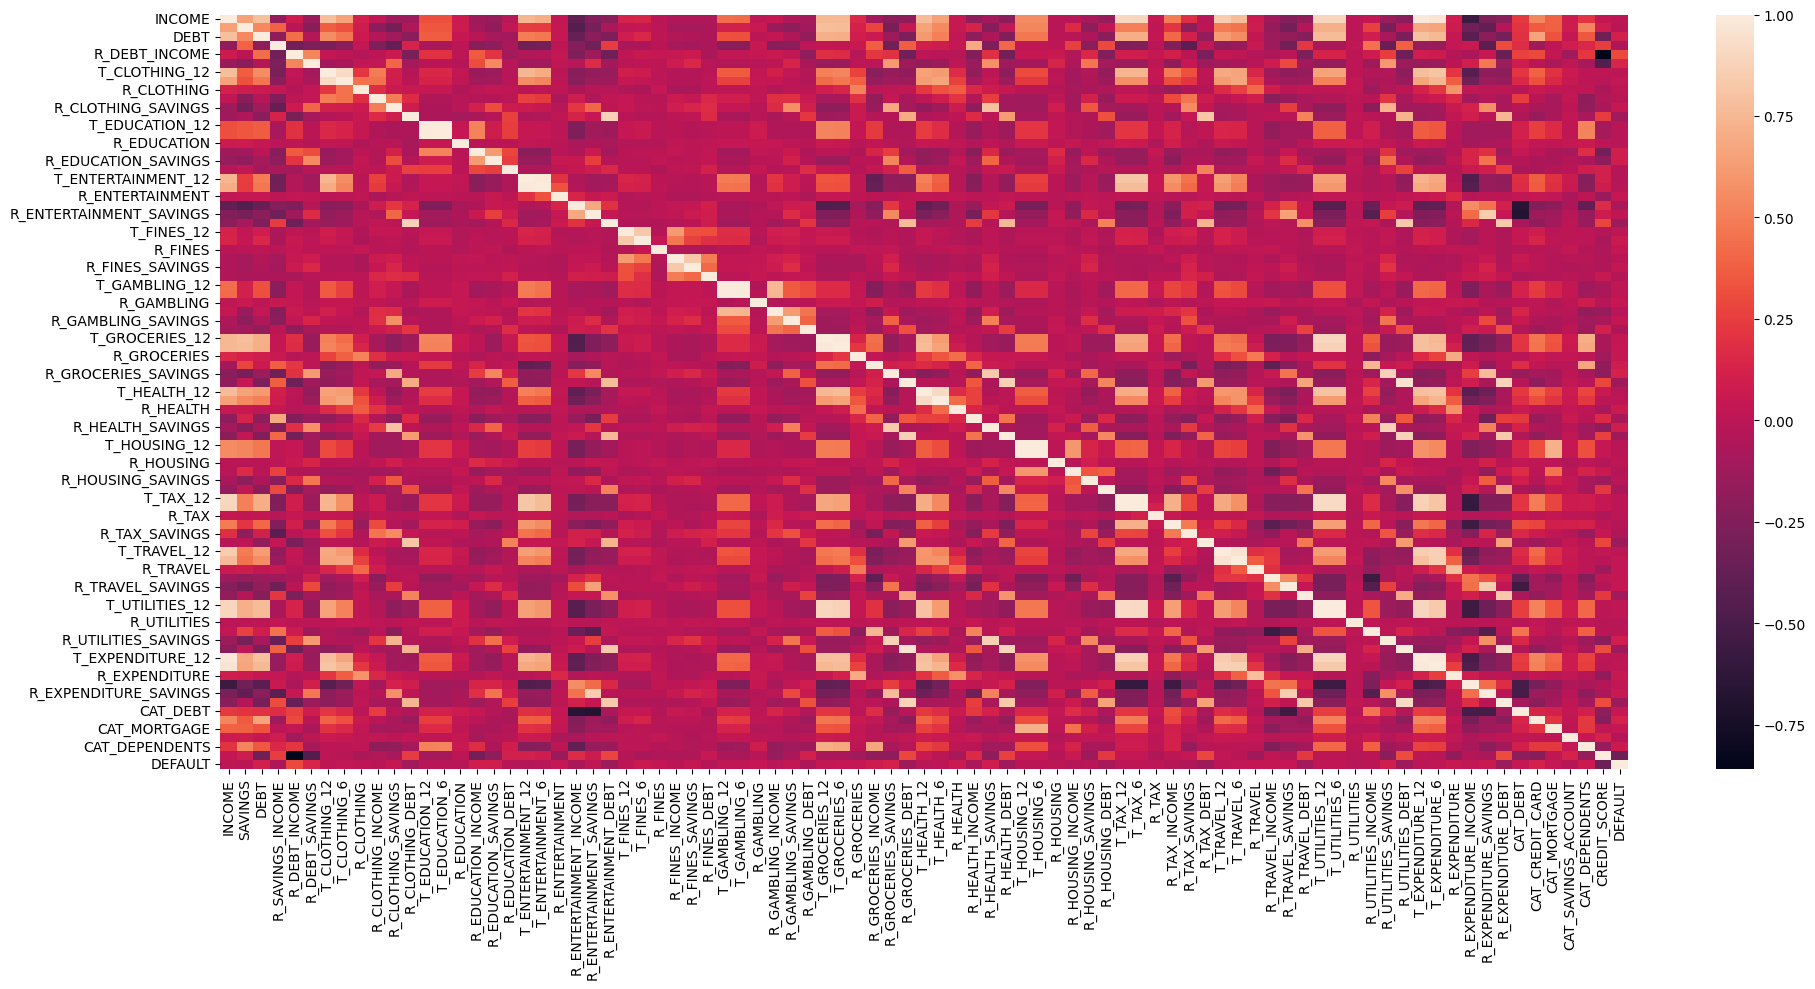

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False)
plt.tight_layout()
plt.show()


In [15]:

import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

In [17]:
from sklearn.feature_selection import VarianceThreshold

# Example: threshold = 0.01
variance_thresholder = VarianceThreshold(threshold=0.01)
variance_thresholder.fit(numerical_df)
low_variance_cols = numerical_df.columns[~variance_thresholder.get_support()].tolist()
print(low_variance_cols)


['R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_DEBT', 'R_ENTERTAINMENT', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HOUSING', 'R_TAX', 'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'R_UTILITIES', 'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT', 'R_EXPENDITURE', 'CAT_SAVINGS_ACCOUNT']


In [19]:
drop_columns=['R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_DEBT', 'R_ENTERTAINMENT', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HOUSING', 'R_TAX', 'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'R_UTILITIES', 'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT', 'R_EXPENDITURE', 'CAT_SAVINGS_ACCOUNT','CUST_ID']

In [20]:
df=df.drop(drop_columns,axis=1)

In [21]:
df.dtypes

INCOME                       int64
SAVINGS                      int64
DEBT                         int64
R_SAVINGS_INCOME           float64
R_DEBT_INCOME              float64
R_DEBT_SAVINGS             float64
T_CLOTHING_12                int64
T_CLOTHING_6                 int64
R_CLOTHING                 float64
T_EDUCATION_12               int64
T_EDUCATION_6                int64
R_EDUCATION_SAVINGS        float64
T_ENTERTAINMENT_12           int64
T_ENTERTAINMENT_6            int64
R_ENTERTAINMENT_INCOME     float64
R_ENTERTAINMENT_SAVINGS    float64
R_ENTERTAINMENT_DEBT       float64
T_FINES_12                   int64
T_FINES_6                    int64
R_FINES                    float64
T_GAMBLING_12                int64
T_GAMBLING_6                 int64
T_GROCERIES_12               int64
T_GROCERIES_6                int64
R_GROCERIES_SAVINGS        float64
R_GROCERIES_DEBT           float64
T_HEALTH_12                  int64
T_HEALTH_6                   int64
R_HEALTH            

In [22]:
df.info

<bound method DataFrame.info of      INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0     33269        0   532304            0.0000        16.0000   
1     77158    91187   315648            1.1818         4.0909   
2     30917    21642   534864            0.7000        17.3000   
3     80657    64526   629125            0.8000         7.8000   
4    149971  1172498  2399531            7.8182        16.0000   
..      ...      ...      ...               ...            ...   
995  328892  1465066  5501471            4.4546        16.7273   
996   81404    88805   680837            1.0909         8.3637   
997       0    42428    30760            3.2379         8.1889   
998   36011     8002   604181            0.2222        16.7777   
999   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  T_EDUCATION_12  \
0            1.2000           1889           945      0.5003               0   
1            3.

In [24]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print('Dropping', col, 'due to zero variance')
        df = df.drop(col, axis=1)

In [26]:
import os

# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now save your file
df.to_csv('data/reduced_data.csv', index=False)


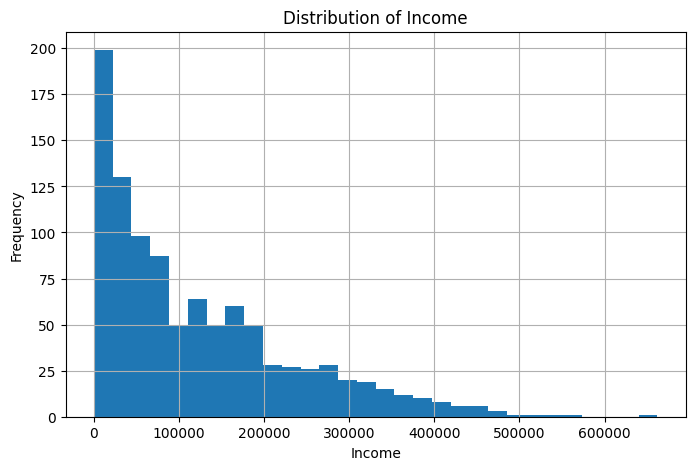

In [28]:
plt.figure(figsize=(8, 5))
df['INCOME'].hist(bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


### Interpretation of the Income Distribution Histogram

The histogram above shows the distribution of the 'INCOME' variable in the dataset. Here are some key points to note:

- **Shape**: The distribution shape (e.g., skewed right/left, normal) indicates how income values are spread among individuals. If the histogram is right-skewed (long tail to the right), most people have lower incomes, with a few having much higher incomes.
- **Central Tendency**: The tallest bars represent the most common income range(s) in the dataset.
- **Spread**: The width of the distribution shows the range of incomes. A wide spread means there is high variability in income.
- **Outliers**: Any bars far from the main cluster may indicate outliers or extreme values.

Understanding this distribution helps in identifying income inequality, potential data issues, and informs further analysis or preprocessing steps.

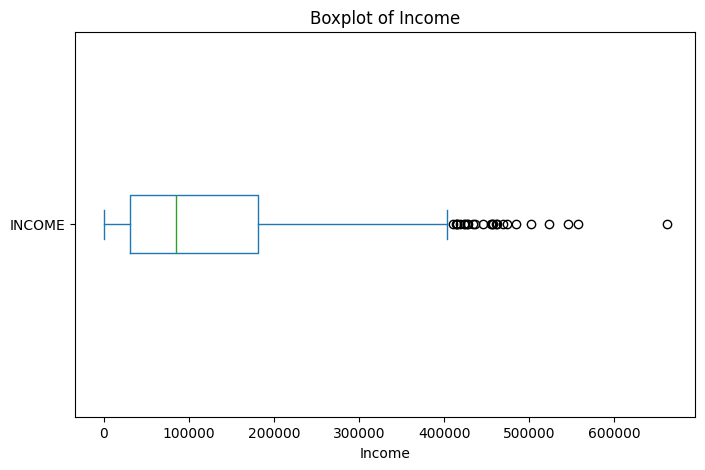

In [29]:
plt.figure(figsize=(8, 5))
df['INCOME'].plot(kind='box', vert=False)
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()


In [30]:
Q1 = df['INCOME'].quantile(0.25)
Q3 = df['INCOME'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['INCOME'] >= lower_bound) & (df['INCOME'] <= upper_bound)]

### Next Steps for Exploratory Data Analysis (EDA)

After analyzing feature importance, you can continue your EDA with the following steps:

1. **Bivariate Analysis:**
   - Explore relationships between important features and the target variable (credit score) using scatter plots, boxplots, or violin plots.
   - Use correlation matrices or pairplots for numerical features.

2. **Categorical Feature Analysis:**
   - Analyze the distribution and impact of categorical variables on credit score using groupby, bar plots, or count plots.

3. **Missing Value Analysis:**
   - Check for missing values and decide on imputation or removal strategies.

4. **Multicollinearity Check:**
   - Use a heatmap or VIF (Variance Inflation Factor) to detect highly correlated features that may affect model performance.

5. **Distribution Analysis:**
   - Visualize the distribution of key features (histograms, KDE plots) to check for skewness or need for transformation.

6. **Outlier Analysis:**
   - Further investigate outliers in other important features, not just income.

7. **Feature Engineering:**
   - Create new features or transform existing ones based on domain knowledge or data patterns.

8. **Summary Statistics:**
   - Generate summary statistics (mean, median, std, etc.) for all features.

Implementing these steps will give you a deeper understanding of your data and help prepare it for modeling.

## Step-by-Step EDA with Code, Interpretation, and Purpose

The following cells will guide you through key EDA steps. Each step includes:
- **Code** to perform the analysis
- **Why** the step is important
- **How to interpret** the output

Let's start with bivariate analysis.

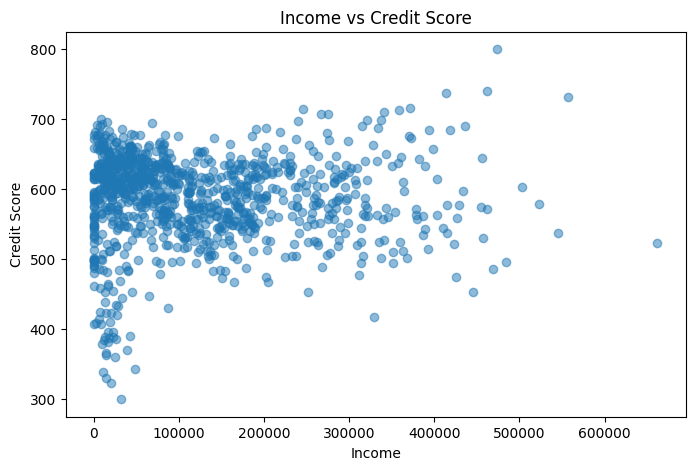

In [33]:
### Step 1: Bivariate Analysis (Scatter Plot)

plt.figure(figsize=(8, 5))
plt.scatter(df['INCOME'], df['CREDIT_SCORE'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score')
plt.show()




- If the points form an upward trend, higher income may be associated with higher credit scores.
- If there is no clear pattern, income may not strongly influence credit score.
- Outliers or clusters can also be identified for further investigation."""

In [35]:
print(df.columns)

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION_SAVINGS',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'T_GAMBLING_12', 'T_GAMBLING_6',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES_SAVINGS',
       'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH',
       'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TAX_6',
       'T_TRAVEL_12', 'T_TRAVEL_6', 'R_TRAVEL', 'R_TRAVEL_INCOME',
       'R_TRAVEL_SAVINGS', 'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_UTILITIES_6',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'R_EXPENDITURE_INCOME',
       'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT', 'CAT_GAMBLING',
       'CAT_DEB

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume df is your dataframe, X contains features only (no target)
X = df.select_dtypes(include=[float, int])  # Use numerical columns
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


d:\Engine\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    feature         VIF
0                    INCOME  173.563036
1                   SAVINGS   11.316793
2                      DEBT   10.716715
3          R_SAVINGS_INCOME    9.532584
4             R_DEBT_INCOME   10.761610
5            R_DEBT_SAVINGS    4.200357
6             T_CLOTHING_12         inf
7              T_CLOTHING_6         inf
8                R_CLOTHING   10.160195
9            T_EDUCATION_12         inf
10            T_EDUCATION_6         inf
11      R_EDUCATION_SAVINGS    4.267152
12       T_ENTERTAINMENT_12         inf
13        T_ENTERTAINMENT_6         inf
14   R_ENTERTAINMENT_INCOME   18.580189
15  R_ENTERTAINMENT_SAVINGS   24.162040
16     R_ENTERTAINMENT_DEBT    5.587244
17               T_FINES_12         inf
18                T_FINES_6         inf
19                  R_FINES    8.389381
20            T_GAMBLING_12         inf
21             T_GAMBLING_6         inf
22           T_GROCERIES_12         inf
23            T_GROCERIES_6         inf


In [37]:
df=pd.read_csv("D:\\NNDL\\data\\reduced_data.csv")

In [39]:
df.dtypes

INCOME                       int64
SAVINGS                      int64
DEBT                         int64
R_SAVINGS_INCOME           float64
R_DEBT_INCOME              float64
R_DEBT_SAVINGS             float64
T_CLOTHING_12                int64
T_CLOTHING_6                 int64
R_CLOTHING                 float64
T_EDUCATION_12               int64
T_EDUCATION_6                int64
R_EDUCATION_SAVINGS        float64
T_ENTERTAINMENT_12           int64
T_ENTERTAINMENT_6            int64
R_ENTERTAINMENT_INCOME     float64
R_ENTERTAINMENT_SAVINGS    float64
R_ENTERTAINMENT_DEBT       float64
T_FINES_12                   int64
T_FINES_6                    int64
R_FINES                    float64
T_GAMBLING_12                int64
T_GAMBLING_6                 int64
T_GROCERIES_12               int64
T_GROCERIES_6                int64
R_GROCERIES_SAVINGS        float64
R_GROCERIES_DEBT           float64
T_HEALTH_12                  int64
T_HEALTH_6                   int64
R_HEALTH            

In [40]:
df = df.drop(['CAT_GAMBLING'], axis=1)

In [41]:
df.dtypes

INCOME                       int64
SAVINGS                      int64
DEBT                         int64
R_SAVINGS_INCOME           float64
R_DEBT_INCOME              float64
R_DEBT_SAVINGS             float64
T_CLOTHING_12                int64
T_CLOTHING_6                 int64
R_CLOTHING                 float64
T_EDUCATION_12               int64
T_EDUCATION_6                int64
R_EDUCATION_SAVINGS        float64
T_ENTERTAINMENT_12           int64
T_ENTERTAINMENT_6            int64
R_ENTERTAINMENT_INCOME     float64
R_ENTERTAINMENT_SAVINGS    float64
R_ENTERTAINMENT_DEBT       float64
T_FINES_12                   int64
T_FINES_6                    int64
R_FINES                    float64
T_GAMBLING_12                int64
T_GAMBLING_6                 int64
T_GROCERIES_12               int64
T_GROCERIES_6                int64
R_GROCERIES_SAVINGS        float64
R_GROCERIES_DEBT           float64
T_HEALTH_12                  int64
T_HEALTH_6                   int64
R_HEALTH            

In [ ]:
import os
preprocessed_file_path = 'data/preprocessed_data.csv'
os.makedirs(os.path.dirname(preprocessed_file_path), exist_ok=True)


In [44]:
import os

# Set your desired save path
save_path = 'data/pre_data.csv'

In [45]:
import os

# Set your desired save path
save_path = 'data/reduced_data.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save DataFrame to CSV
df.to_csv(save_path, index=False)
